In [1]:
import pandas as pd
from fbprophet import Prophet
from openpyxl.workbook import Workbook
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../forecasting/historical_data/fs_res_weekly.csv', parse_dates=['ds'])
df.loc[(df['ds'] > '2020-03-14') & (df['ds'] < '2021-03-28'), 'y'] = None
df.head()

,ds,y
0,2019-01-04,11366.0
1,2019-01-11,9233.0
2,2019-01-18,9695.0
3,2019-01-25,9085.0
4,2019-02-01,11321.0


In [12]:
m = Prophet(weekly_seasonality=True,daily_seasonality=True) # growth='flat'
m.fit(df)

C:\Users\usrocu\Anaconda3\envs\time_series\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [13]:
future = m.make_future_dataframe(periods=104, freq='W')
future.tail()

,ds
272,2024-03-24
273,2024-03-31
274,2024-04-07
275,2024-04-14
276,2024-04-21


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


C:\Users\usrocu\Anaconda3\envs\time_series\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\usrocu\Anaconda3\envs\time_series\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
272,2024-03-24,11421.952053,10215.081791,12740.394229
273,2024-03-31,11364.160706,10090.672577,12598.763378
274,2024-04-07,11158.090502,10076.579503,12417.660142
275,2024-04-14,11010.771573,9744.056408,12240.206274
276,2024-04-21,11016.545218,9754.505528,12152.564130


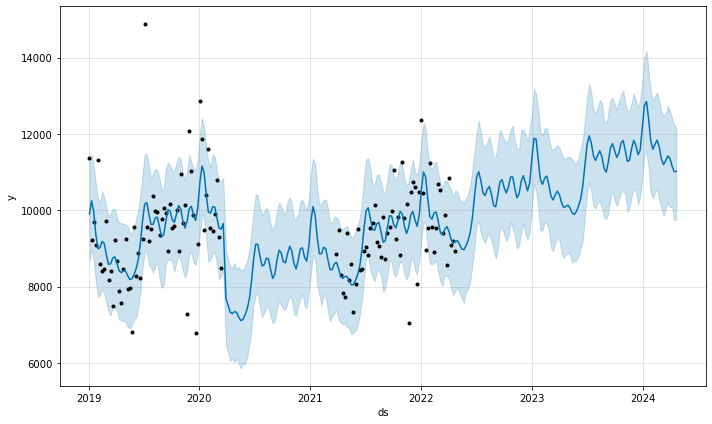

In [15]:
fig1 = m.plot(forecast)

C:\Users\usrocu\Anaconda3\envs\time_series\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\usrocu\Anaconda3\envs\time_series\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\usrocu\Anaconda3\envs\time_series\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



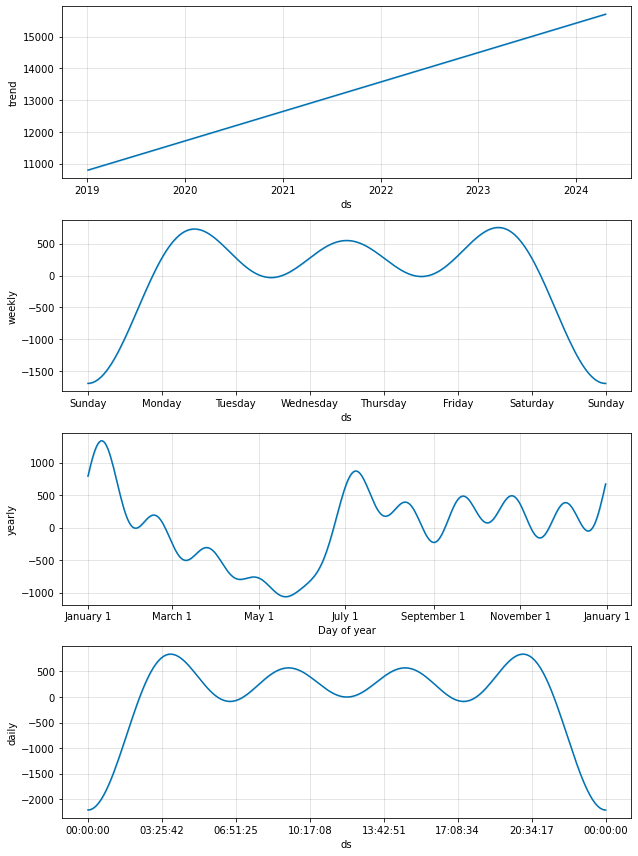

In [16]:
fig2 = m.plot_components(forecast)


In [17]:
from fbprophet.plot import plot_plotly, plot_components_plotly
import plotly.express as px
fig = plot_plotly(m, forecast)
fig.write_image('outputs/fs_res_weekly.png')
fig.write_html("outputs/fs_res_weekly.html",include_plotlyjs="cdn")
plot_plotly(m, forecast)

In [18]:
plot_components_plotly(m, forecast)


C:\Users\usrocu\Anaconda3\envs\time_series\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\usrocu\Anaconda3\envs\time_series\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\usrocu\Anaconda3\envs\time_series\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
272,2024-03-24,15634.451908,10215.081791,12740.394229,15634.411596,15634.492089,-4212.499855,-4212.499855,-4212.499855,-2210.562297,...,-1691.26594,-1691.26594,-1691.26594,-310.671618,-310.671618,-310.671618,0.0,0.0,0.0,11421.952053
273,2024-03-31,15652.227869,10090.672577,12598.763378,15652.186905,15652.268499,-4288.067163,-4288.067163,-4288.067163,-2210.562297,...,-1691.26594,-1691.26594,-1691.26594,-386.238926,-386.238926,-386.238926,0.0,0.0,0.0,11364.160706
274,2024-04-07,15670.003830,10076.579503,12417.660142,15669.962185,15670.044854,-4511.913328,-4511.913328,-4511.913328,-2210.562297,...,-1691.26594,-1691.26594,-1691.26594,-610.085091,-610.085091,-610.085091,0.0,0.0,0.0,11158.090502
275,2024-04-14,15687.779791,9744.056408,12240.206274,15687.737364,15687.821119,-4677.008217,-4677.008217,-4677.008217,-2210.562297,...,-1691.26594,-1691.26594,-1691.26594,-775.179980,-775.179980,-775.179980,0.0,0.0,0.0,11010.771573
276,2024-04-21,15705.555752,9754.505528,12152.564130,15705.512609,15705.597713,-4689.010533,-4689.010533,-4689.010533,-2210.562297,...,-1691.26594,-1691.26594,-1691.26594,-787.182296,-787.182296,-787.182296,0.0,0.0,0.0,11016.545218


In [20]:
forecast.to_excel('outputs/fs_res_weekly.xlsx')